In [ ]:
import pandas as pd

leads = f"https://docs.google.com/spreadsheets/d/e/2PACX-1vT7JoeeE6B1JNkjBkFvjDtSUlq_FrD3GipaAVpz7bj75k9YhHDD0V3k_lY_enhaduzITUJOSLrvbogZ/pub?output=csv"
cars=f"https://docs.google.com/spreadsheets/d/e/2PACX-1vRZ7-IuvfMJKYFn9GbbUoUf-gyNaGdTOZuL4ifOguPocLp3HcSGthejv7rzPLcyV1juK_Sw1TTXLcTv/pub?gid=1539553890&single=true&output=csv"

lead_b=pd.read_csv(leads)
cars_b=pd.read_csv(cars)

In [ ]:
base_final=lead_b.merge(cars_b, on="vehicle_registration",how="left")
base_final["Depto"]=["GUV" if i=="Guaviare" else "LGJ"  if i =="La Guajira" else str(i)[0:3].upper() for i in base_final.registration_state]
base_final.head(10)

,vehicle_registration,price,percentage_discount,discount_value,price_total_with_discount,price_extra_fee_applied,extra_fee_credit_applied,price_total_with_extra_fee,date,channel,issue,payment_method,vehicle_class,registration_state,Depto
0,PGM41F,495900,8.01,39700,456200,0.0,2.25,0.0,2021-07-01-00:01:03,cpc,NaN,NaN,MOTOCICLETA,Antioquia,ANT
1,MKU62C,495900,7.50,37200,458700,0.0,2.25,0.0,2021-07-01-00:01:28,cpc,NaN,NaN,MOTOCICLETA,Huila,HUI
2,MYU58E,495900,0.00,0,495900,0.0,2.25,0.0,2021-07-01-00:01:40,cpc,NaN,NaN,MOTOCICLETA,Meta,MET
3,XYC221,497850,10.00,49800,448050,0.0,1.80,448050.0,2021-07-01-00:02:51,organic,NaN,NaN,AUTOMOVIL,Bogotá d C.,BOG
4,UTY89D,559050,8.05,45000,514050,0.0,0.00,0.0,2021-07-01-00:03:33,renewal,NaN,NaN,MOTOCICLETA,Bogotá d C.,BOG
5,WBD900,497850,10.00,49800,448050,0.0,2.25,0.0,2021-07-01-00:03:50,cpc,NaN,NaN,AUTOMOVIL,Bogotá d C.,BOG
6,WFK446,699900,0.00,0,699900,0.0,2.25,0.0,2021-07-01-00:04:19,cpc,NaN,NaN,CAMPERO,Atlántico,ATL
7,MYB304,435600,6.52,27700,407900,0.0,1.80,407900.0,2021-07-01-00:04:28,cpc,issue,pse,AUTOMOVIL,Bogotá d C.,BOG
8,NKF47A,495900,6.51,32300,463600,0.0,1.80,0.0,2021-07-01-00:05:15,cpc,NaN,NaN,MOTOCICLETA,Santander,SAN
9,KMJ809,328800,10.01,32900,295900,0.0,2.25,0.0,2021-07-01-00:05:22,cpc,NaN,NaN,AUTOMOVIL,Bogotá d C.,BOG


### Debido que la pregunta es encontrar una forma de optimizar los descuentos por deparatamentos, como primera medida se trata de entender la relación entre el porcentaje de descuento y las regiones donde se hacen estas cotizaciones. Adicionalmente se de estrada se trata de enentender si la clase de vehículo influye en la asignación del descuento


In [ ]:

cuenta_dep=base_final.groupby(["registration_state","Depto"]).agg({"percentage_discount":["mean","std"],"price":["mean","std"]  })
cuenta_dep.columns = ['_'.join(col) for col in cuenta_dep.columns]
cuenta_dep=cuenta_dep.reset_index()
cuenta_dep=cuenta_dep.set_index("Depto")

cuenta_ve=base_final.groupby(["vehicle_class"]).agg({"percentage_discount":["mean","std"],"price":["mean","std"]  })
cuenta_ve.columns = ['_'.join(col) for col in cuenta_ve.columns]
cuenta_ve=cuenta_ve.reset_index()
cuenta_ve=cuenta_ve.set_index("vehicle_class")



,registration_state,percentage_discount_mean,percentage_discount_std,price_mean,price_std
Depto,,,,,
AMA,Amazonas,4.654118,2.218167,507082.352941,63613.175383
ANT,Antioquia,8.123718,2.437464,502087.210322,123582.634019
ARA,Arauca,4.287634,1.919126,493219.465649,91162.723774
ARC,Archipiélago de San Andrés Providencia y Santa...,0.467285,1.798287,522143.046358,110271.542573
ATL,Atlántico,0.010237,0.273278,503736.936299,151448.013340
BOG,Bogotá d C.,9.334689,2.568454,509926.788691,153541.844014
BOL,Bolívar,1.172183,2.803432,454350.486502,114591.541301
BOY,Boyacá,4.788726,2.140445,547233.459163,181333.162586
CAL,Caldas,5.715857,2.145049,504405.050234,126335.234241


In [ ]:
cuenta_dep_ve=base_final.groupby(["registration_state","Depto","vehicle_class"]).agg({"percentage_discount":["mean","std"],"price":["mean","std"]  })
cuenta_dep_ve.columns = ['_'.join(col) for col in cuenta_dep_ve.columns]
cuenta_dep_ve=cuenta_dep_ve.reset_index()
cuenta_dep_ve=cuenta_dep_ve.set_index("Depto")
cuenta_dep_ve

,registration_state,vehicle_class,percentage_discount_mean,percentage_discount_std,price_mean,price_std
Depto,,,,,,
AMA,Amazonas,AUTOMOVIL,4.010000,5.670996,403500.000000,4879.036790
AMA,Amazonas,CAMIONETA,4.565000,1.109399,684600.000000,21600.000000
AMA,Amazonas,MOTOCICLETA,4.690667,2.180696,495906.666667,32952.904755
ANT,Antioquia,AUTOMOVIL,8.360870,2.083412,421957.486540,61079.921025
ANT,Antioquia,CAMIONETA,4.680476,2.084006,720262.016807,118700.511595
...,...,...,...,...,...,...
VAL,Valle del Cauca,CAMIONETA,1.112139,2.346827,709605.087209,112725.912312
VAL,Valle del Cauca,CAMPERO,0.766432,1.827430,835119.315789,101981.412194
VAL,Valle del Cauca,MOTOCICLETA,1.085232,2.603004,478703.443698,48545.577545


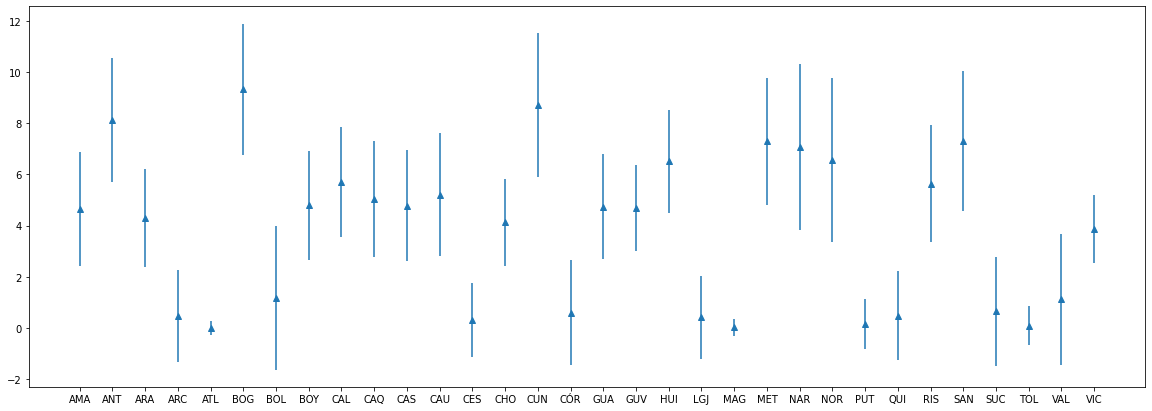

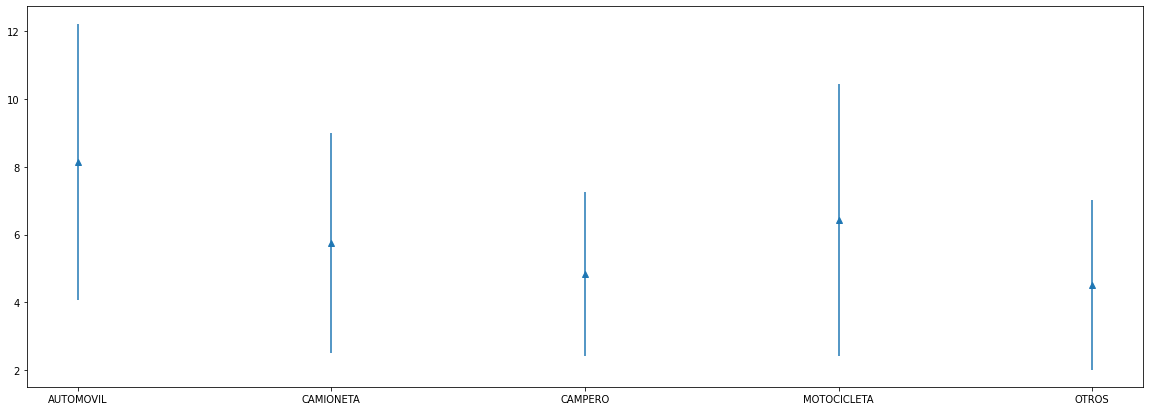

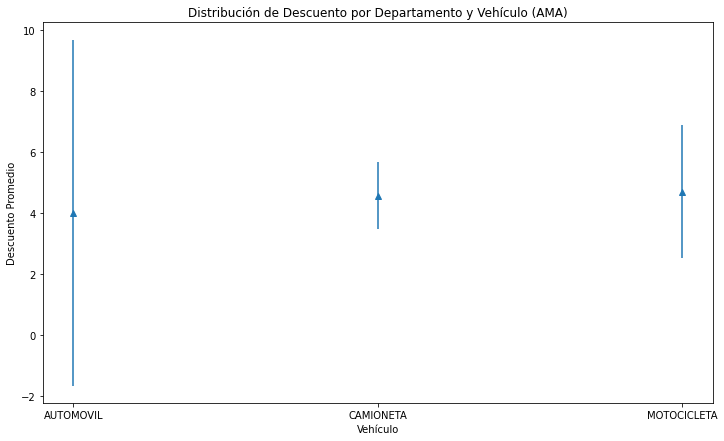

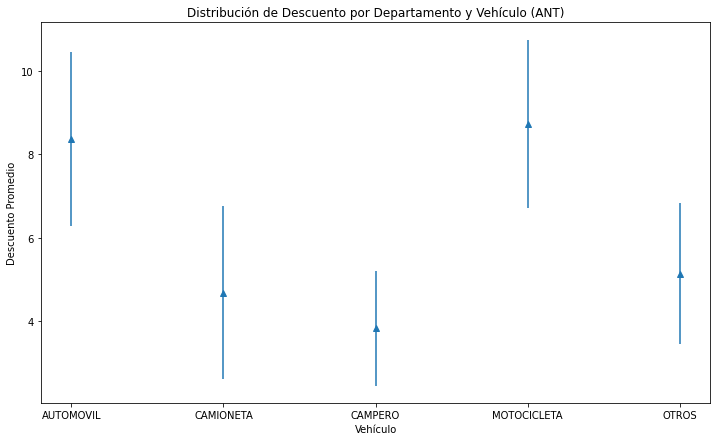

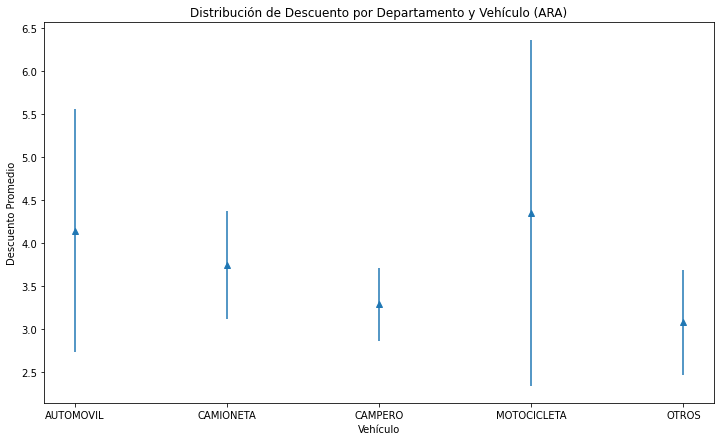

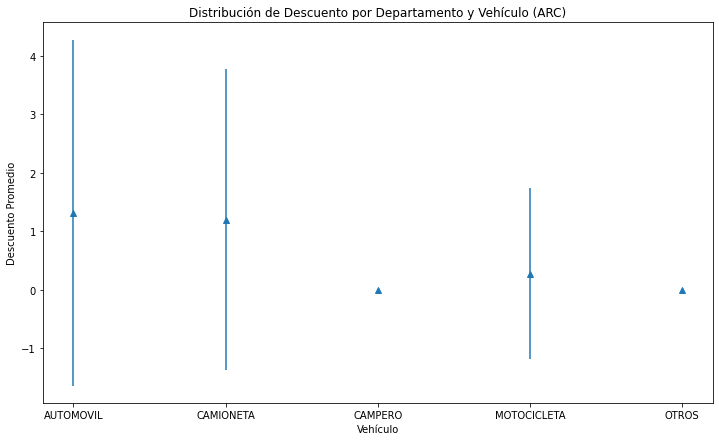

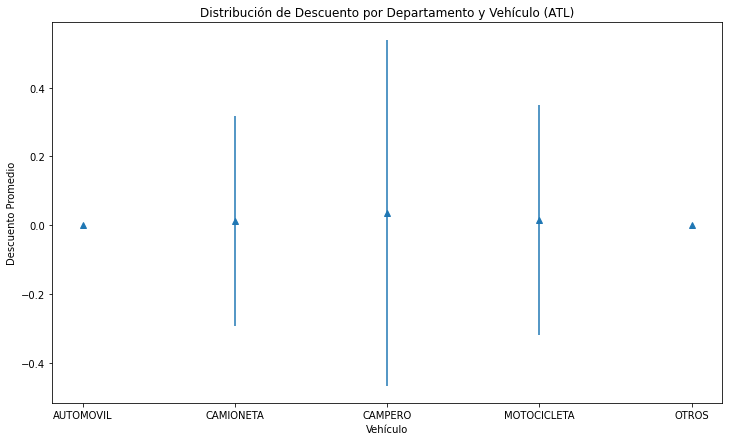

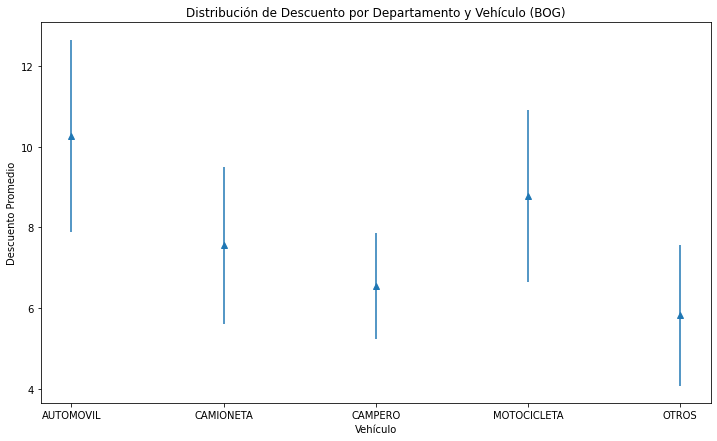

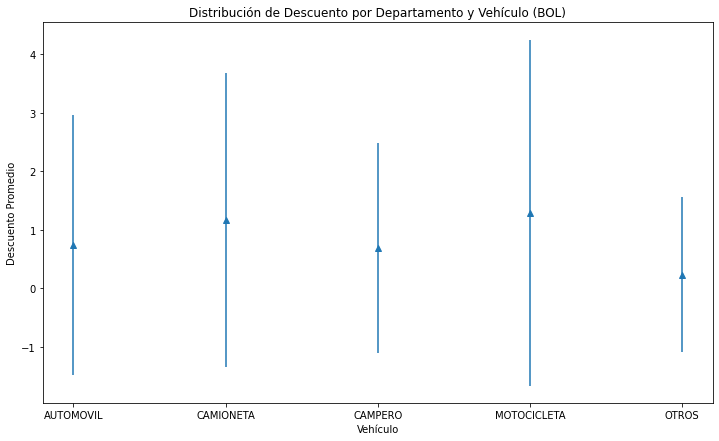

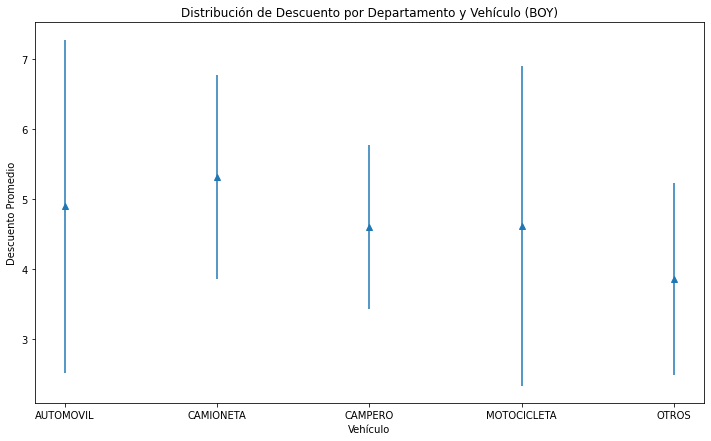

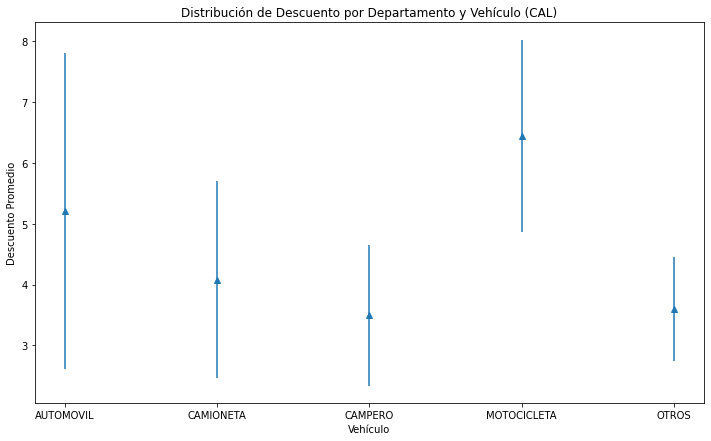

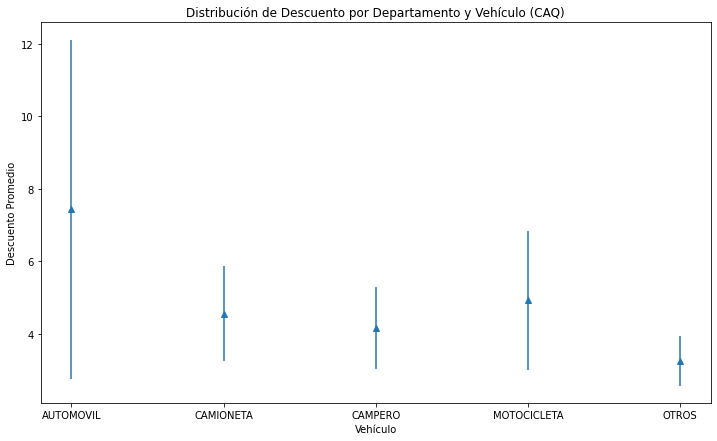

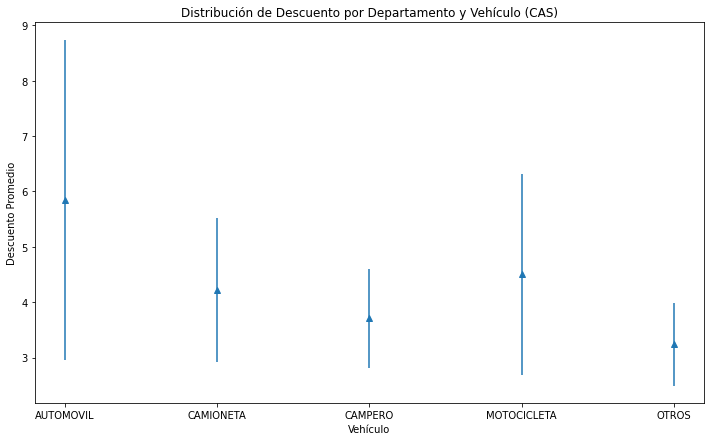

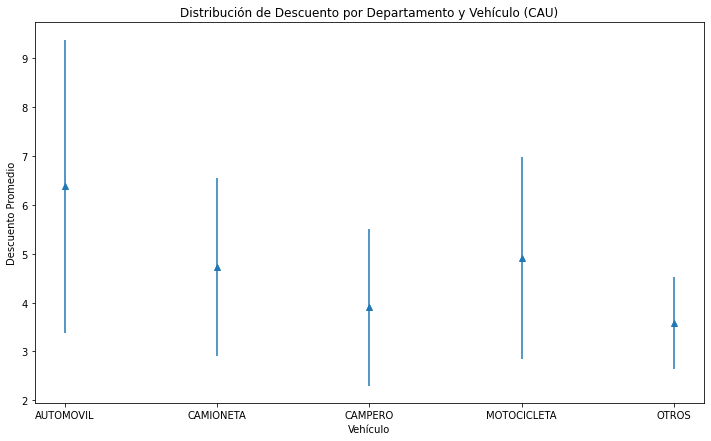

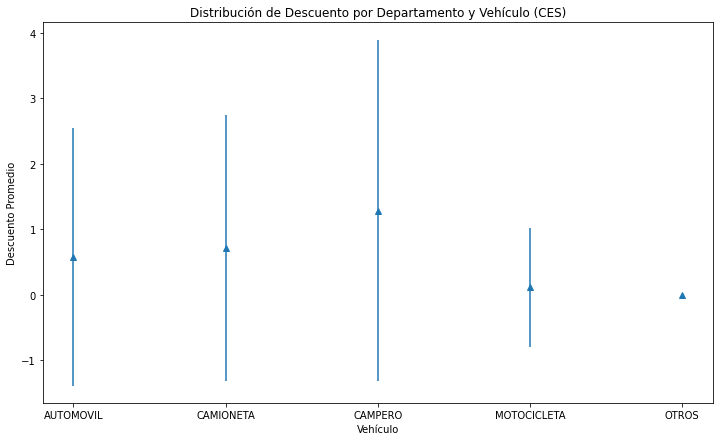

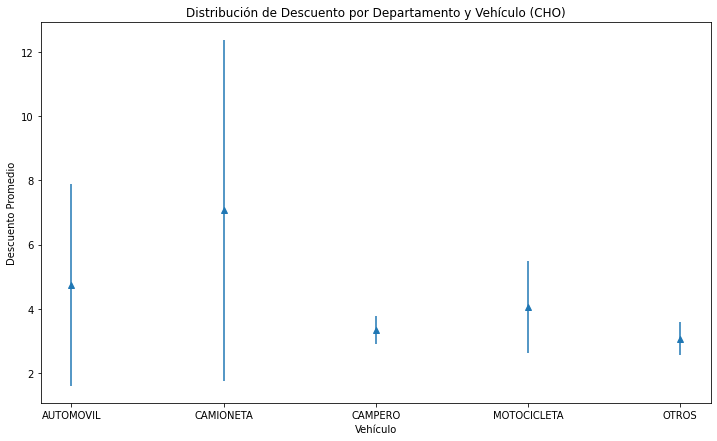

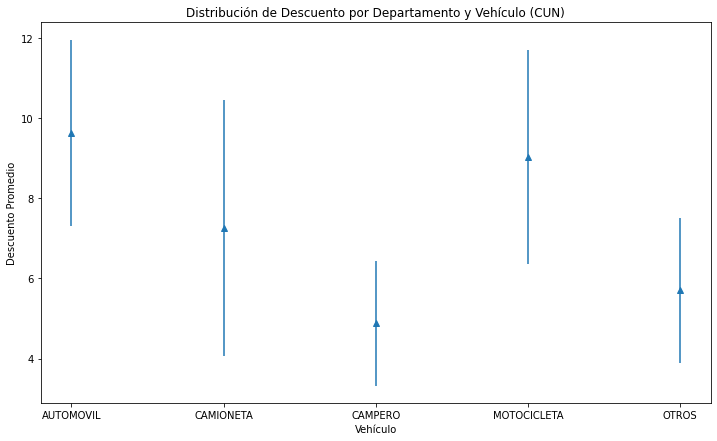

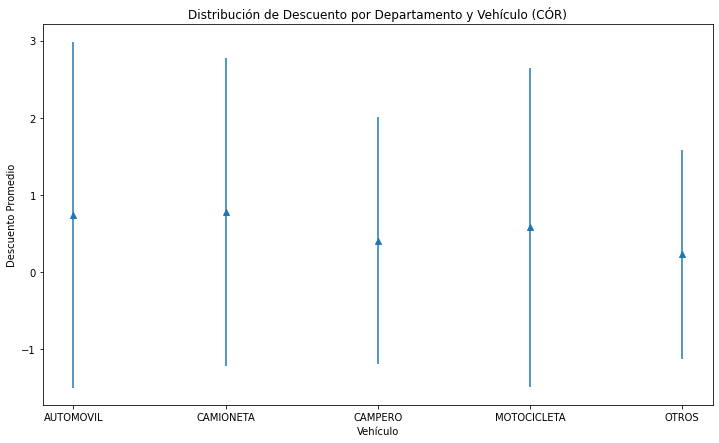

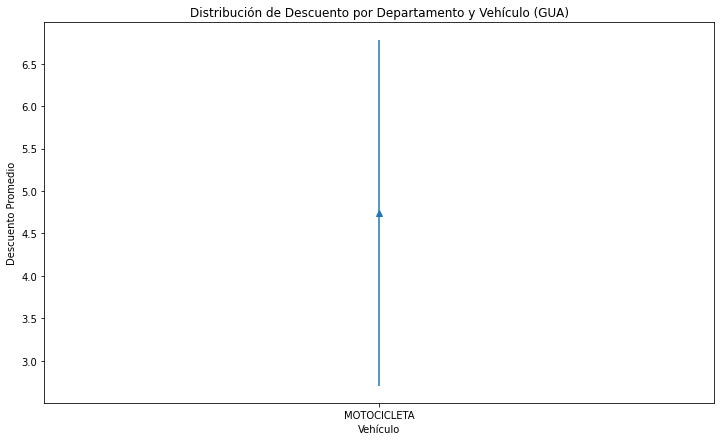

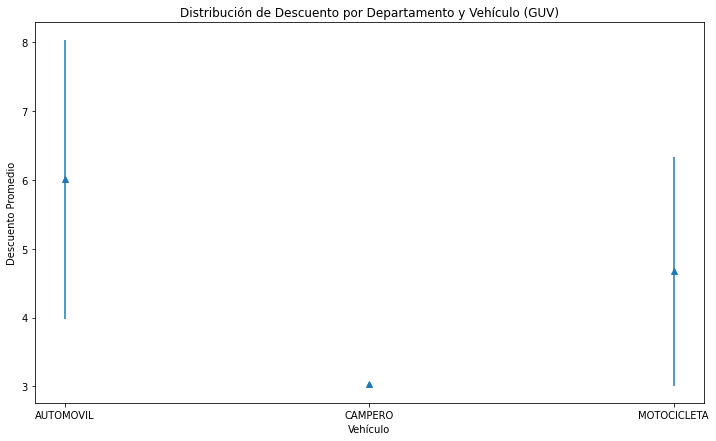

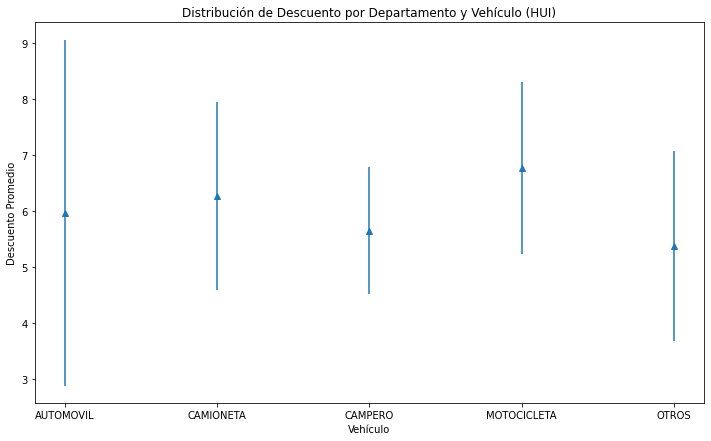

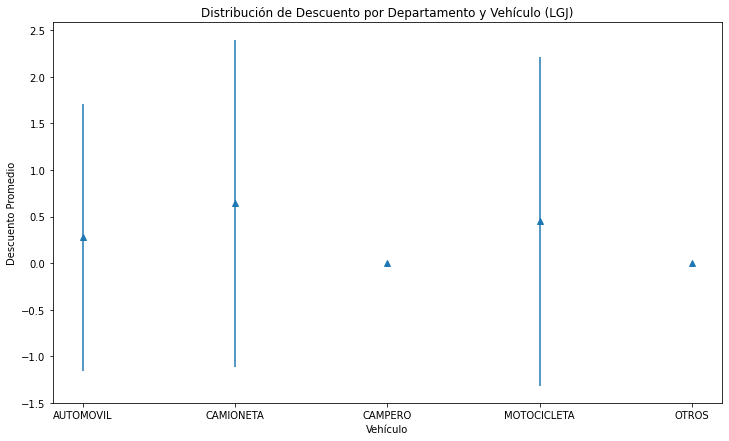

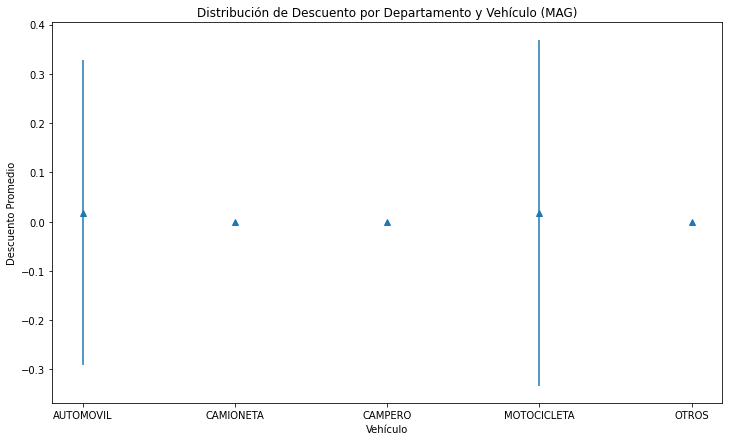

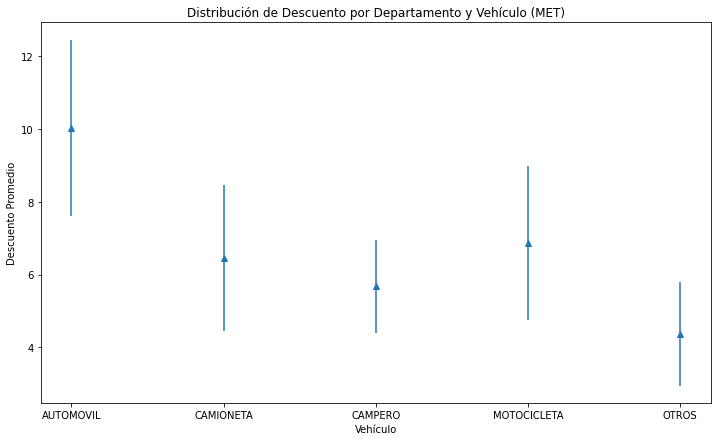

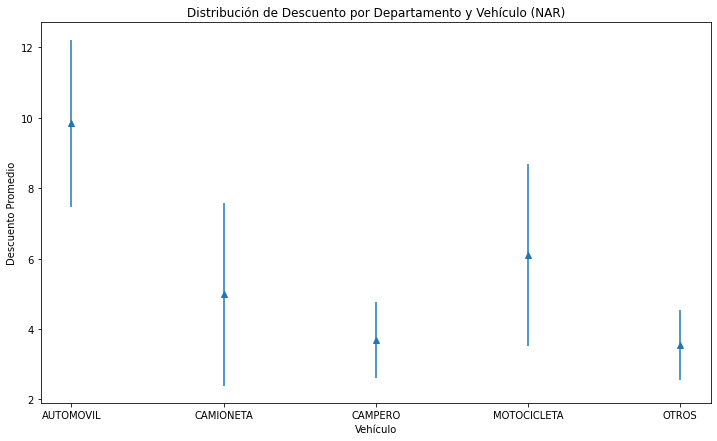

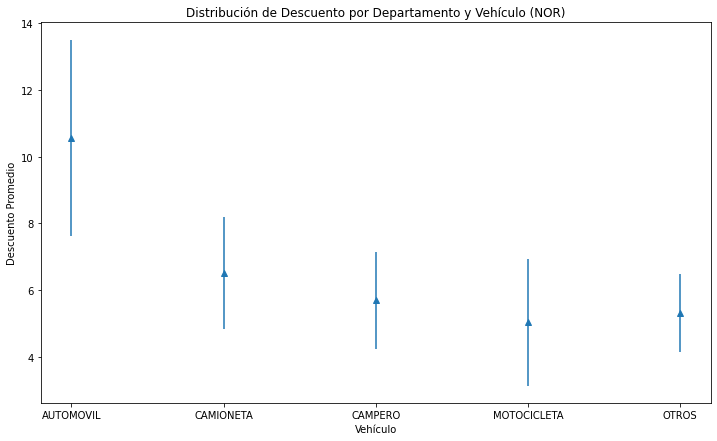

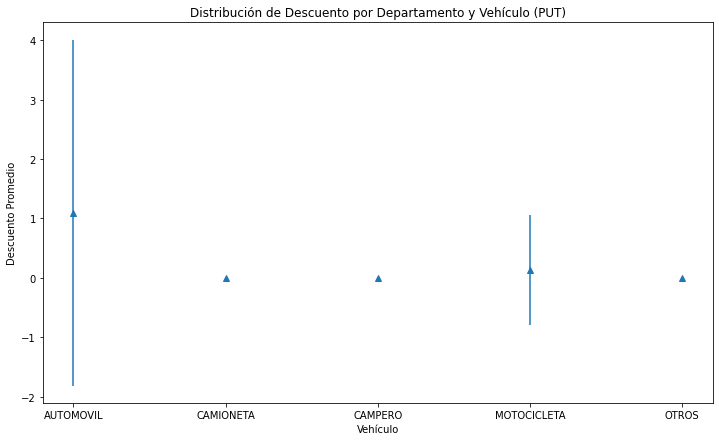

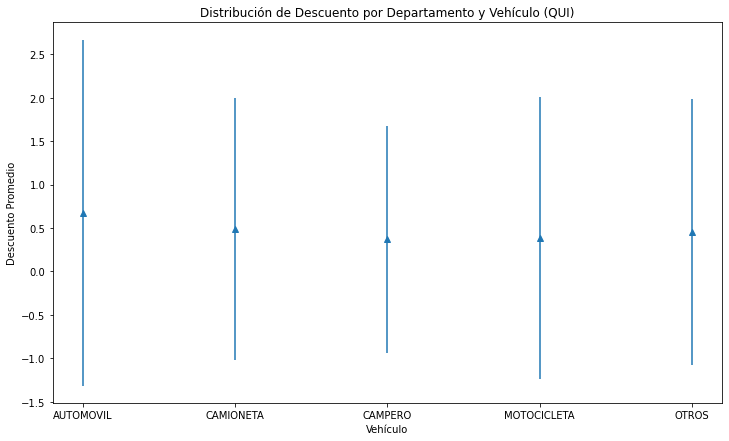

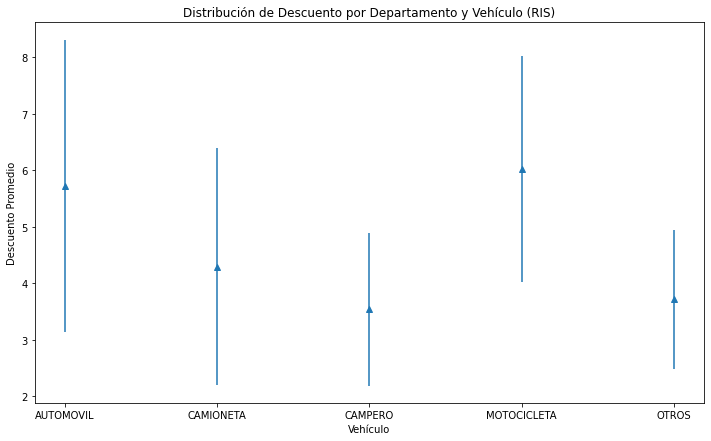

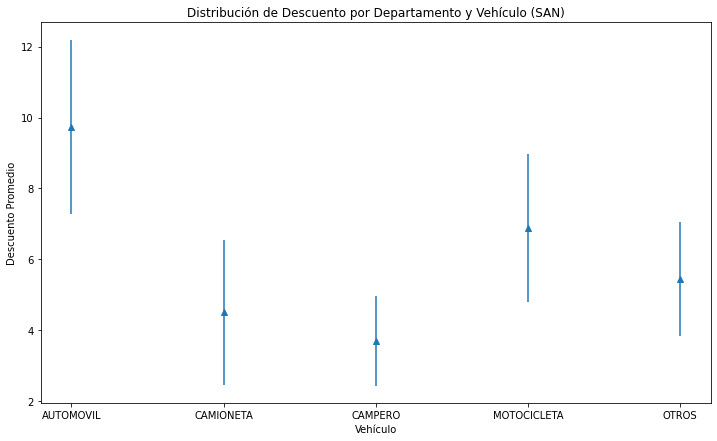

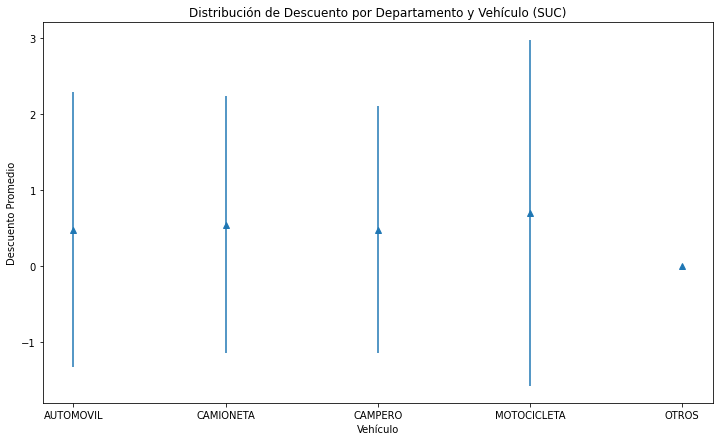

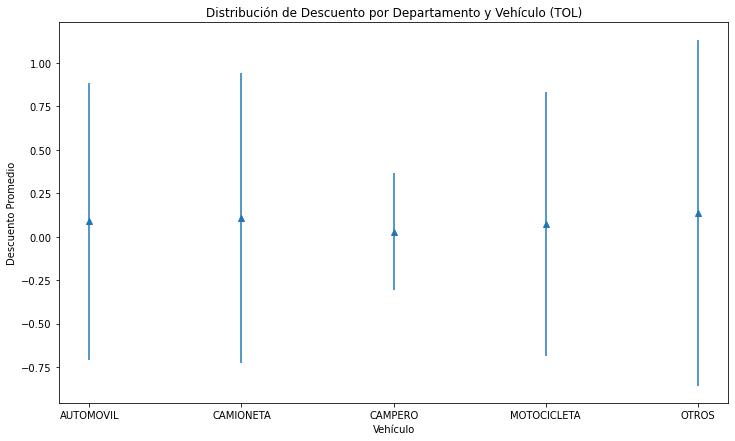

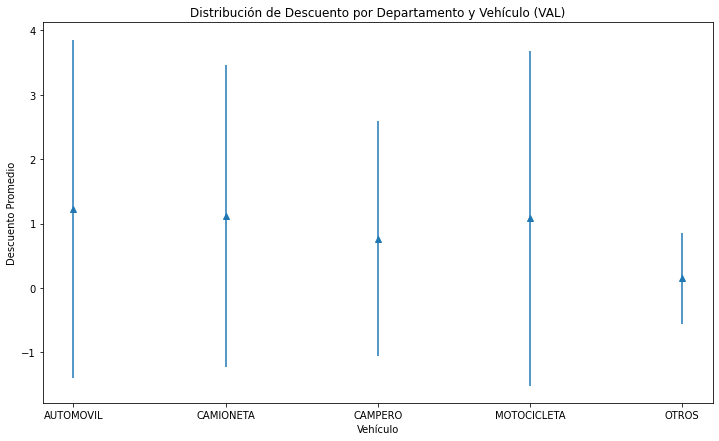

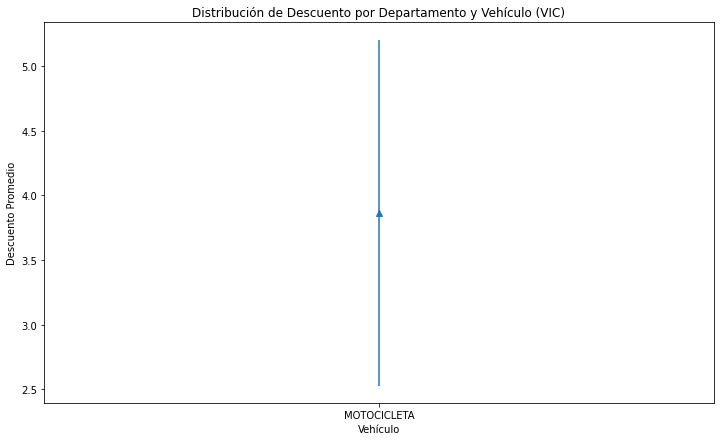

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(20,7))
ax.errorbar(cuenta_dep.index,cuenta_dep["percentage_discount_mean"],yerr=cuenta_dep["percentage_discount_std"],linestyle='None', marker='^')
plt.show()

fig,ax=plt.subplots(figsize=(20,7))
ax.errorbar(cuenta_ve.index,cuenta_ve["percentage_discount_mean"],yerr=cuenta_ve["percentage_discount_std"],linestyle='None', marker='^')
plt.show()

for i in cuenta_dep_ve.index.unique():
    final=cuenta_dep_ve[cuenta_dep_ve.index==i]
    fig,ax=plt.subplots(figsize=(12,7))
    ax.errorbar(final["vehicle_class"],final["percentage_discount_mean"],yerr=final["percentage_discount_std"],linestyle='None', marker='^')
    ax.set_xlabel("Vehículo")
    ax.set_ylabel("Descuento Promedio")
    ax.set_title("Distribución de Descuento por Departamento y Vehículo ("+str(i)+")")
    plt.show()

### Después de correr gráficas para ver un poco la relación entre el departamentos y la tasa de descuento, se puede ver que que sie existe diferencia marcadas entre la tasa media de descuento entre regiones, primordialmente Bogotá, Antioquia, Cundinamarca y Meta, donde estos departamentos presentan una mayor ditribución en la tasa de descuento frente a lso demás, adicionalmente frente a la pregunta de como se distribuia esta tasa de descunto frente a los tipos de vehículos, se puede ver que la concentración más alta existe en los automiviles y las motos, que son las que en promedio tienen la tasa más alta. 

### Se buscó observar como se distribuia la tasa de descuento por departamentos, pero entre tipos de vehículos, y aunque es importante resaltar que se ven distribuciones mixtas, en general los automoviles y motos.

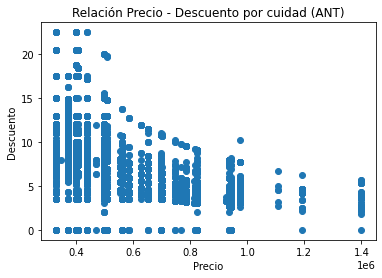

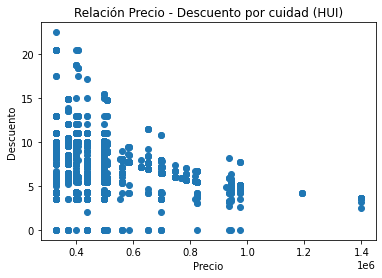

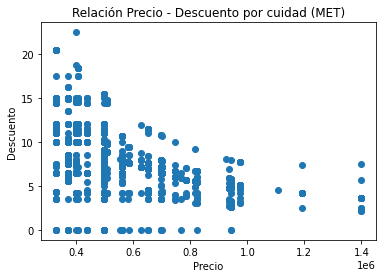

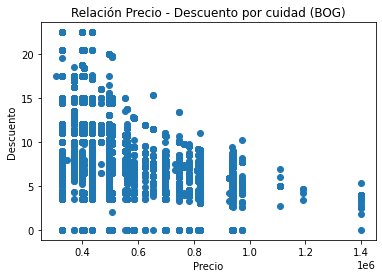

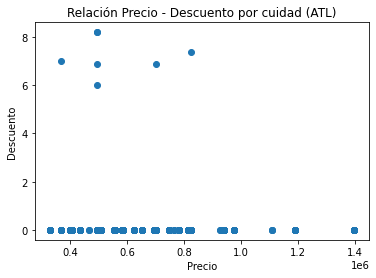

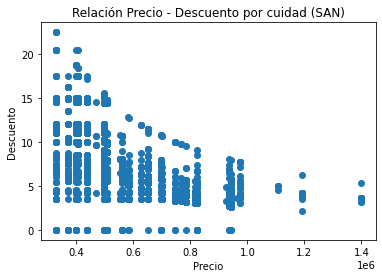

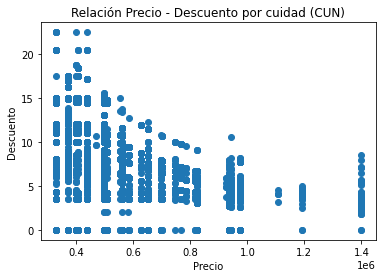

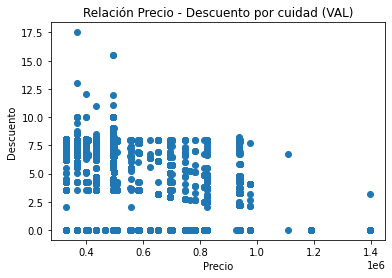

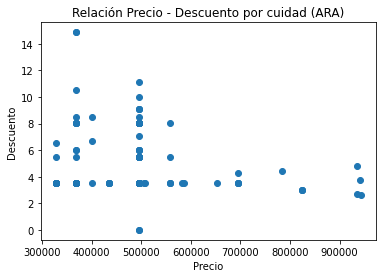

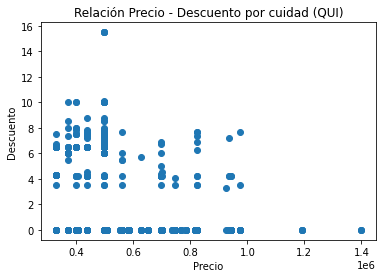

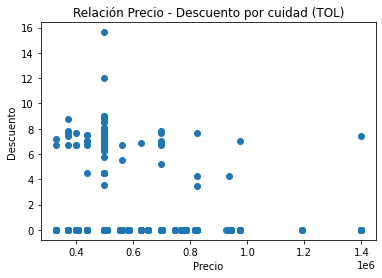

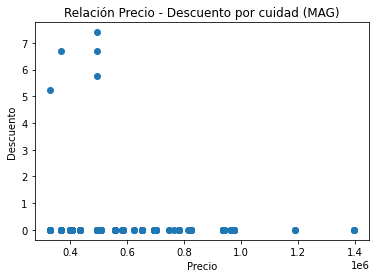

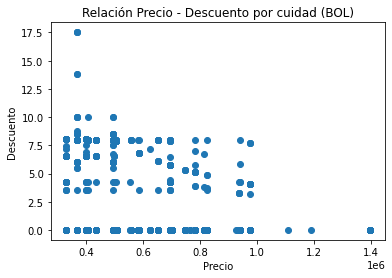

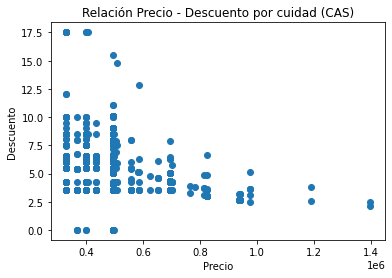

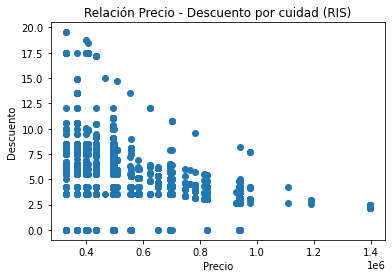

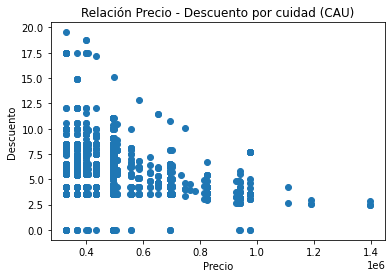

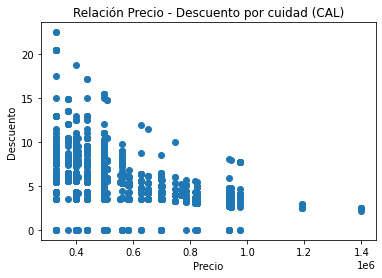

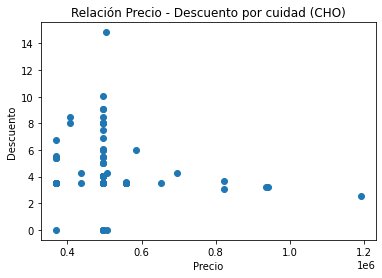

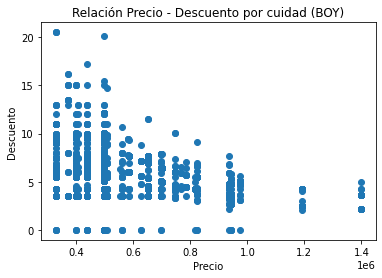

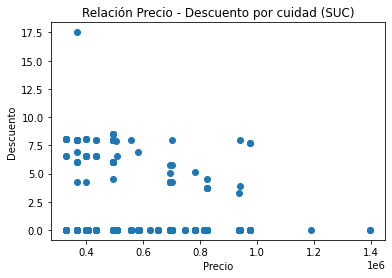

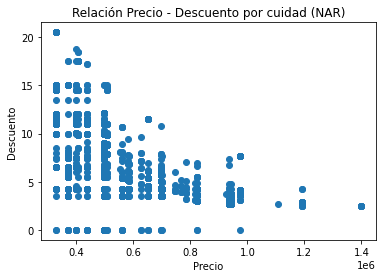

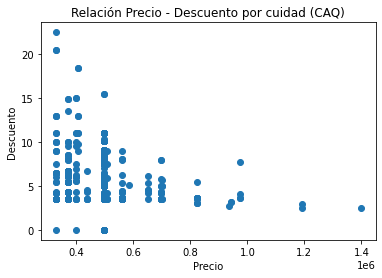

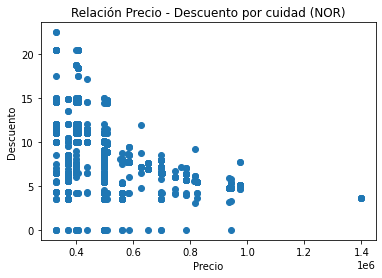

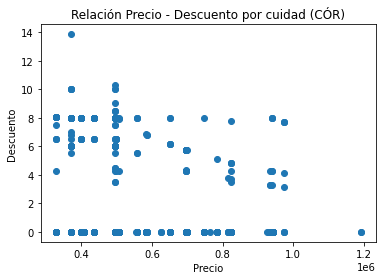

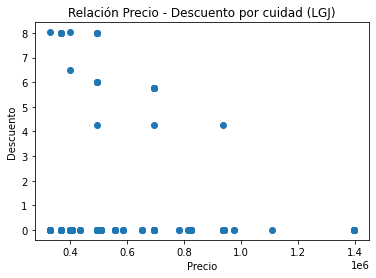

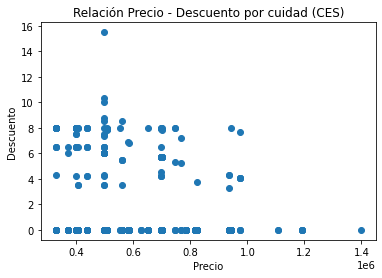

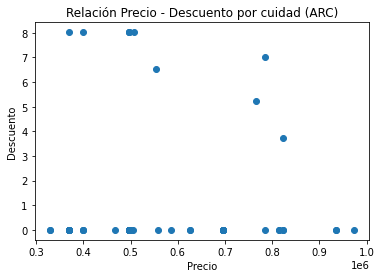

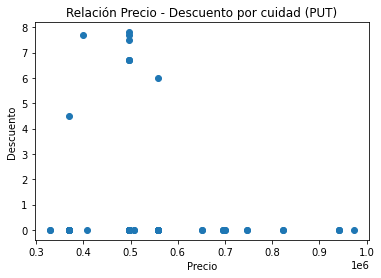

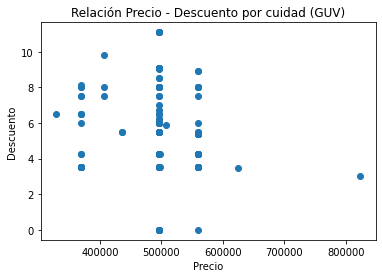

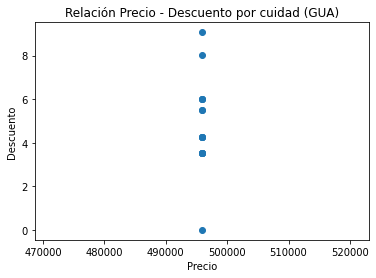

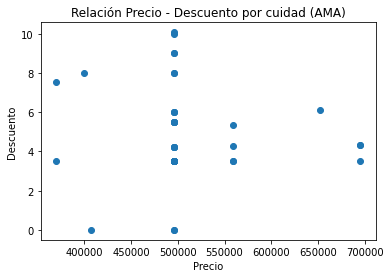

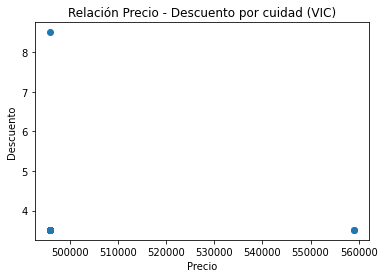

In [ ]:

for i in base_final["Depto"].unique():
      scatter=base_final[base_final["Depto"]==i]
      plt.scatter(scatter["price"],scatter["percentage_discount"])
      plt.title("Relación Precio - Descuento por cuidad ("+str(i)+")")
      plt.xlabel("Precio")
      plt.ylabel("Descuento")
      plt.show()

In [ ]:
from pandas import factorize

for i in ["Depto", "vehicle_class","price","percentage_discount","extra_fee_credit_applied"]:
    if i in ["percentage_discount"]:
      continue
    else:
      if base_final[i].dtypes=="O":
        try:
            labels, categories = factorize(base_final[i])
            base_final["labels"+str(i)] = labels
            print("Variable "+str(i))
            print(base_final["percentage_discount"].corr(base_final["labels"+str(i)]))
            base_final=base_final.drop(columns=["labels"+str(i)])
        except: continue        
      else:
          try: 
              print("Variable "+str(i))
              print(abs(base_final["percentage_discount"].corr(base_final[i])))
          except: continue       


depto=base_final
for i in ["Depto", "vehicle_class","price","percentage_discount","extra_fee_credit_applied"]:
    if i in ["percentage_discount", "depto"]:
      continue
    else:
      if depto[i].dtypes=="O":
        try:
            for j in depto["Depto"].unique():
                otra=depto[depto["Depto"]==j]
                labels, categories = factorize(otra[i])
                otra["labels"+str(i)] = labels
                print("Variable "+str(i)+"  Depratamento "+str(j))
                print(otra[["percentage_discount"]].corr(otra["labels"+str(i)]))
                otra=otra.drop(columns=["labels"+str(i)])
        except: continue        
      else:
        try:
            for j in depto["Depto"].unique():
              otra=depto[depto["Depto"]==j]
              print("Variable "+str(i)+"  Depratamento "+str(j))
              print(otra["percentage_discount"].corr(otra[i]))
        except: continue       


Variable Depto
-0.4382374837824158
Variable vehicle_class
-0.045831630834998194
Variable price
0.20258466921689253
Variable extra_fee_credit_applied
0.23821502187968172


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Variable Depto  Depratamento ANT
Variable vehicle_class  Depratamento ANT
Variable price  Depratamento ANT
0.5546144868785243
Variable price  Depratamento HUI
0.13683733346004007
Variable price  Depratamento MET
0.37968530176704873
Variable price  Depratamento BOG
0.5393848636185858
Variable price  Depratamento ATL
0.012460019656093247
Variable price  Depratamento SAN
0.5285867721136007
Variable price  Depratamento CUN
0.4285508718135637
Variable price  Depratamento VAL
0.05190230290876372
Variable price  Depratamento ARA
0.19558255421625526
Variable price  Depratamento QUI
0.018829737634848194
Variable price  Depratamento TOL
0.01331792714667219
Variable price  Depratamento MAG
0.014710281395775866
Variable price  Depratamento BOL
0.08390533170430256
Variable price  Depratamento CAS
0.27753647751748917
Variable price  Depratamento RIS
0.336644426191867
Variable price  Depratamento CAU
0.27497766663147893
Variable price  Depratamento CAL
0.3048643672975165
Variable price  Depratamento 

#### Se condujo un exploración de correlación entre la tasa de descuento y las dieferente variables, se excluyó por el momento el precio total y los diferentes precios que son la suma o resta de los fees o los descuentos, debido a que van a estar correlaciondos directamente con la tasa de descuento.

### también se genera la pregunta de si el objetivo es mejorar la distribiución de la tasa de descuentom es importe saber cuantos de esas cotizaciones significaron realmente en un issue o compra.A continuación se presenta este análisis.

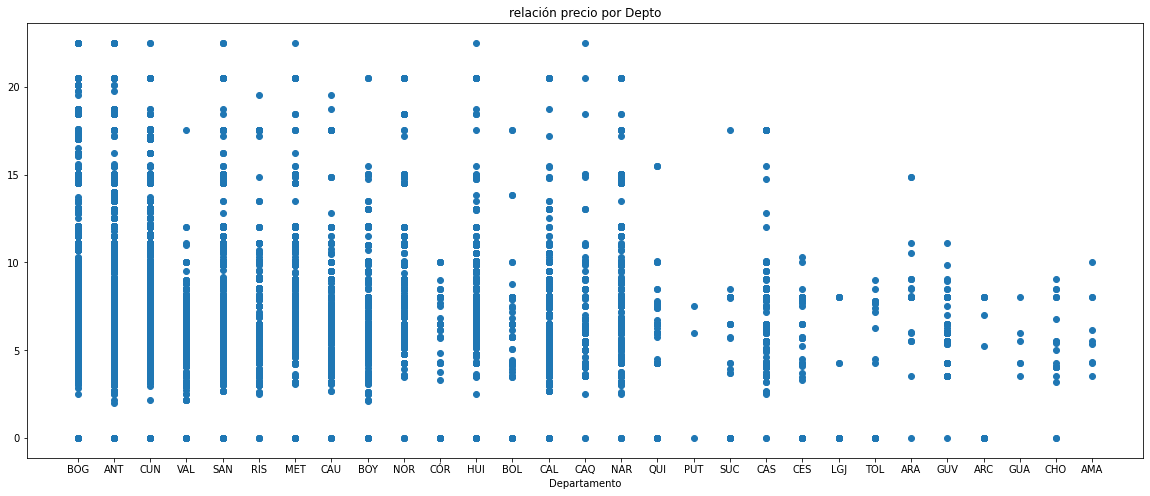

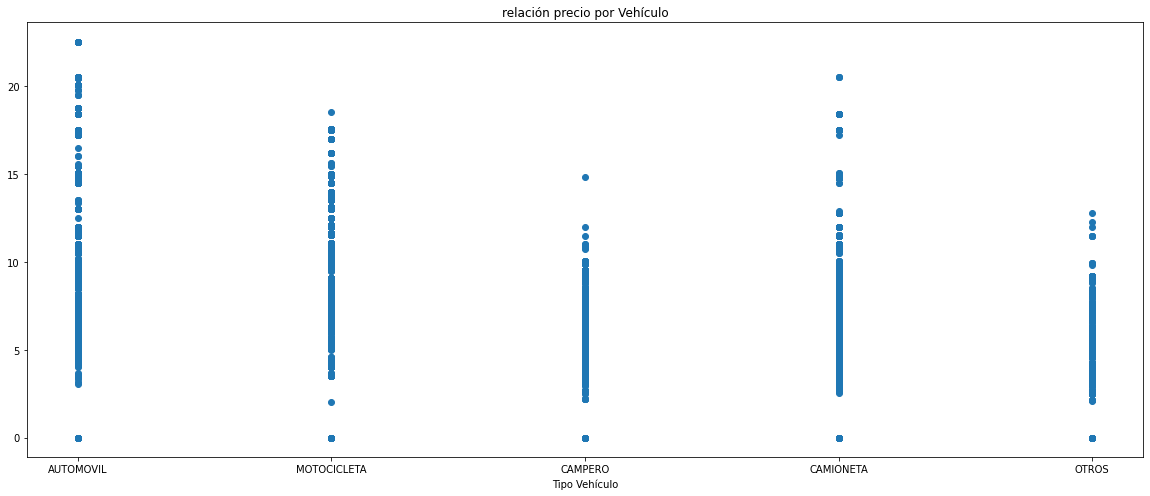

In [ ]:
import matplotlib.pyplot as plt
solo_admitidos=base_final[~base_final["issue"].isna()]

plt.figure(figsize=(20,8))
plt.scatter(solo_admitidos["Depto"],solo_admitidos["percentage_discount"])
plt.title("relación precio por Depto")
plt.xlabel("Departamento")
plt.show()

plt.figure(figsize=(20,8))
plt.scatter(solo_admitidos["vehicle_class"],solo_admitidos["percentage_discount"])
plt.title("relación precio por Vehículo")
plt.xlabel("Tipo Vehículo")
plt.show()

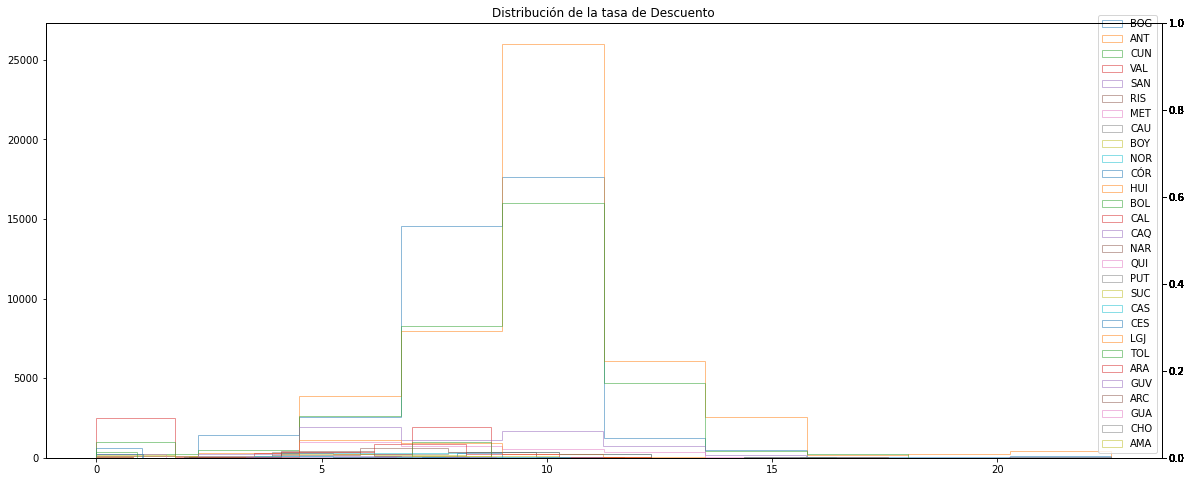

In [ ]:
deptos=[i for i in solo_admitidos["Depto"].unique()]
deptos.remove("ANT")
fig,ax=plt.subplots(figsize=(20,8))
aux1=solo_admitidos[solo_admitidos["Depto"]=="ANT"]
ax.hist(aux1["percentage_discount"],alpha = 0.5, histtype="step")

for i in deptos:
  aux=solo_admitidos[solo_admitidos["Depto"]==i]
  ax.twinx()
  ax.hist(aux["percentage_discount"],alpha = 0.5, histtype="step")
  ax.legend([i for i in solo_admitidos["Depto"].unique()])

ax.set_title("Distribución de la tasa de Descuento")

plt.show()

### Como se muestra en la distribución de la tasa de descuento por departamentos, Bogotá siendo una ciudad individual es la que más issue tiene y con ello una tasa más alta de descuento, seguido por antioqui, que aunque presenta un mayor número de issue pero es importante resaltar que es un departamento y por lo tanto va a tener un mayor número de personas que contrataron el servicio.

### pero con esto sigue la pregunta de como optimizar la distribución del descuento y es importante preguntarse sí la distribución en el momento es adecuada, dado que  la tasa se centra más al medio en las regiones con mayor contratación pero sigue siendo alta frente a las de otras regiones. y las tasas más altas sorresponden a las regiones que menos contratación del servicio tienen. 



In [ ]:
base_op=base_final[~base_final["issue"].isna()].groupby(["Depto"]).agg({"percentage_discount":["mean","std","count","max","min"] })
base_op.columns = ['_'.join(col) for col in base_op.columns]
base_op=base_op.reset_index()
base_op2=base_op[["Depto","percentage_discount_max","percentage_discount_count"]]
print(base_op2.sort_values("percentage_discount_max",ascending=[False]).head(20))
print(base_op2.sort_values("percentage_discount_max").head(20))

   Depto  percentage_discount_max  percentage_discount_count
19   MET                    22.52                       2778
4    BOG                    22.52                      47765
1    ANT                    22.52                      38155
13   CUN                    22.52                      32987
25   SAN                    22.51                       5882
17   HUI                    22.51                       2412
8    CAQ                    22.51                        362
20   NAR                    20.53                       1251
6    BOY                    20.53                        796
7    CAL                    20.53                       1587
21   NOR                    20.53                       1380
24   RIS                    19.53                       1322
10   CAU                    19.53                       1108
9    CAS                    17.52                        260
5    BOL                    17.52                       2060
26   SUC                

In [ ]:
base_op["descuento_issue"]=base_op["percentage_discount_mean"]/base_op["percentage_discount_count"]
base_op

,Depto,percentage_discount_mean,percentage_discount_std,percentage_discount_count,percentage_discount_max,percentage_discount_min,descuento_issue
0,AMA,6.122222,2.142381,9,10.00,3.51,0.680247
1,ANT,8.692031,2.086123,38155,22.52,0.00,0.000228
2,ARA,7.994074,2.940785,27,14.87,0.00,0.296077
3,ARC,1.494571,3.065045,35,8.02,0.00,0.042702
4,BOG,10.017019,2.449489,47765,22.52,0.00,0.000210
5,BOL,4.144301,3.997914,2060,17.52,0.00,0.002012
6,BOY,6.603430,2.909462,796,20.53,0.00,0.008296
7,CAL,7.145463,2.077420,1587,20.53,0.00,0.004502
8,CAQ,5.936050,2.605693,362,22.51,0.00,0.016398
9,CAS,6.206423,3.110886,260,17.52,0.00,0.023871


#### No propongo un modelo para solucionar la distribución de la tasa de descuento, traté de abordarlo como un rpoblema de optimización, buscando la maximización de la tasa de descuento sujeto a la tasa de descuento por región, pero el plantamiento del el problema no fue óptimo dado que solo terminaba obteniendo la media de las tasa promedios de descuento por región.

#### Para mi análisis final, lo que use fue la proporción de la tasa media por departamento sobre el total de personas que adquirio el servicio. Esta proporción lo que muestra es que, a pesar que las regiones con una tasa media mayor y una tasa máxima mayor, dado que tienen un número mayor de contratación hace que esa proporción sea mucho menor, lo que me indica, que en estas regiones hay un espacio mayor para subir esa tasa de descuento, o que en muchos casos, la tasa de descuento para muchos que adquirieron en servicio, es menor que la promedio, con lo que podrían dar un poco más de descuento.




#3. 
### (Programming) Neo tiene un script matricial complejo. El script de matriz es una cuadrícula X de
cadenas. Consta de caracteres alfanuméricos, espacios y símbolos (!, @, #, $,%, &).

In [ ]:
input=["Tsi","h%x","i #","sM","$a","#t%","ir!"]


def decodifiacion(n,m,input):
  final=[]
  for i in input:
    d=""
    if len(i)<m:
      d=i+" "
    else:d=i 
    lista=[]
    for j in d:
      lista.append(j)
    final.append(lista) 
  
  x="" 
  for i in range(0,m):
    for j in range(0,n):
      x=x+str(final[j][i])
  matriz=[]
  pasos=0
  for i in x:
    matriz.append(i)
  especial=["!", "@", "#", "$","%","&"," "]
  indices=[]
  for i in matriz:
    if i in especial:
      indices.append(pasos)
      pasos=pasos+1
    else: pasos=pasos+1  

  for i in range(0,len(indices)-1):
    n=0
    for j in range(i+1,len(indices)-1):
      n=n+1
      if (indices[j]-indices[i])>n:
        matriz[indices[i]]=" "
  string_final=""      
  for i in matriz:
    string_final=string_final+i
  return (string_final)    

x=decodifiacion(7,3,input)
print(x)

This  is  Matrix#  %!


# **3.** 

## (SQL) Teniendo en cuenta las bases de datos usadas en el primer punto, importe las a un motor
de bases de datos, preferiblemente PostgreSQL, y realice las siguientes consultas (agregando la
sintaxis de la consulta):
a. El valor promedio de descuento para las pólizas emitidas por depto y carrocería
b. Los deptos en los que la tasa de conversión es menor al 30%

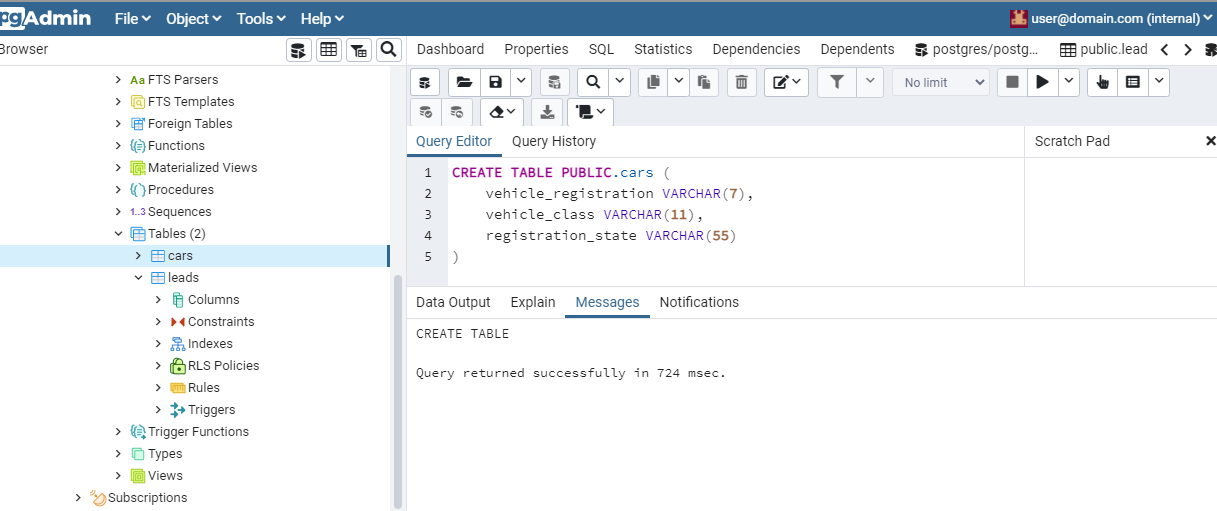

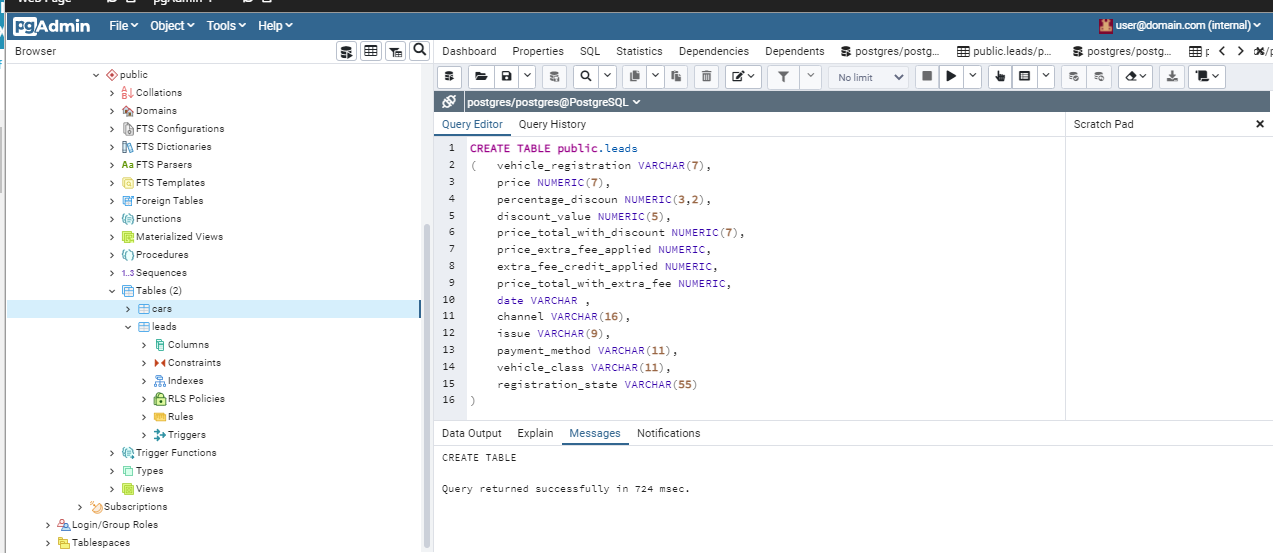

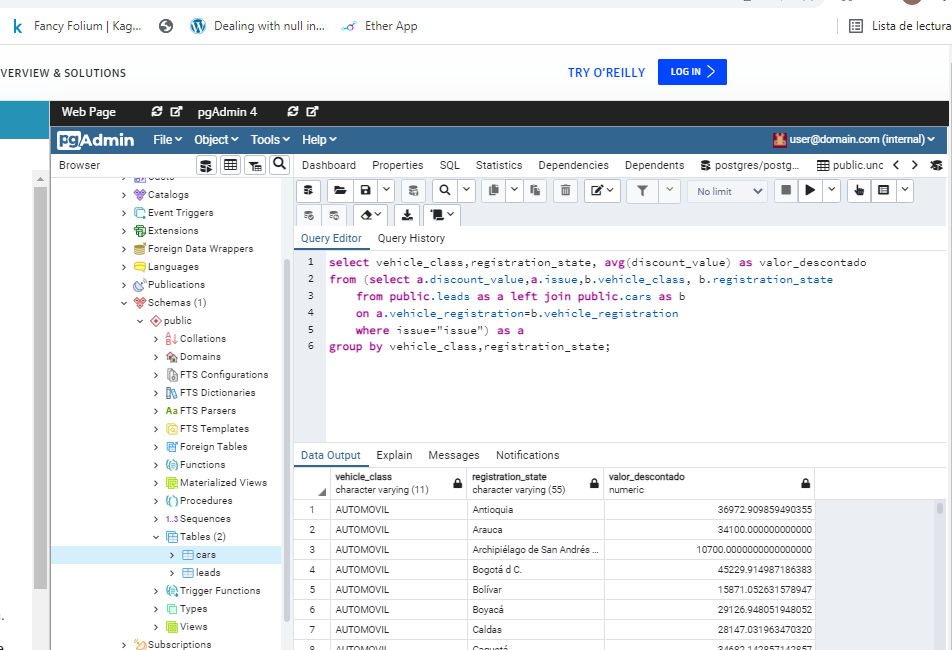

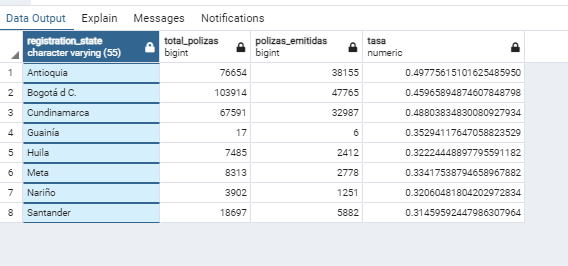

##4. Si tienes una base para detectar fraudes y tienes una gran base de transacciones(incluyendo fraudulentas) que tipo de metodología sugieres para clasificar dado que evidentemente hay un desbalance en la información de transacciones fraudulentas y no fraudulentas?

#### Dado el desbalance de la muestra, se pueden aplicar varias técnica para poder balancear entre ellas el oversampling, que consiste en aumentar los registros de la clase que menos número de registros tiene,
#### el undersampling, que es reducir el número de registros de la clase predominante, estas dos técnicas se muestran acontinuación

In [ ]:
import pandas as pd
base=f'https://docs.google.com/spreadsheets/d/e/2PACX-1vRAE5CsQp2IjM79Sqkqj-K7lDQ81_HPy9XQ8uQ9L-t9x-YpJ0PoBbtLNhZ6NnCBAQ/pub?output=csv'
base_fraudes=pd.read_csv(base)
base_fraudes["fraudes"]=[1 if i =="FRAUDE" else 0 for i in base_fraudes["observacion"]]
base_fraudes

,id_cliente,fecha,hora,comercio,observacion,Industria,Valor,fraudes
0,A,2/1/2021,9,R,NaN,ALMACEN,"1,000,000",0
1,A,2/1/2021,10,S,FRAUDE,ECOMMERCE,"3,000",1
2,A,2/1/2021,15,X,FRAUDE,ECOMMERCE,"2,000,000",1
3,F,2/1/2021,10,T,NaN,PASARELLA,"1,566,705",0
4,H,2/1/2021,21,S,NaN,ECOMMERCE,"1,256,550",0
...,...,...,...,...,...,...,...,...
91,B,3/15/2021,5,T,NaN,PASARELLA,"1,224,404",0
92,C,3/15/2021,23,O,NaN,VIAJES,"900,000",0
93,D,3/15/2021,13,R,NaN,ALMACEN,"985,714",0
94,H,3/15/2021,15,T,NaN,PASARELLA,"1,170,018",0


In [ ]:

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import  RandomOverSampler
from collections import Counter
 
muetra_over=RandomOverSampler(sampling_strategy='minority')
x=base_fraudes.drop(columns=["fraudes"])
y=base_fraudes["fraudes"]
x_oversamp, y_oversamp = muetra_over.fit_resample(x, y)
print(Counter(y_oversamp))

Counter({0: 81, 1: 81})


In [ ]:
muetra_under=RandomUnderSampler(sampling_strategy='majority')
x=base_fraudes.drop(columns=["fraudes"])
y=base_fraudes["fraudes"]
x_undersamp, y_undersamp = muetra_under.fit_resample(x, y)
print(Counter(y_undersamp))

Counter({0: 15, 1: 15})


#### Dado que el oversampling y el undersampling inclica o aumentar por copia el número de registros o por el contrario eliminar aleatoriamente el numero de registro, esto puede llegar a traer problemas debido a la copia de información, que puede llevar a sobreespecificacíon de las los coefciientes o a la eliminación de información donde se puede perder información relevante.

#### otra técnica que puede resultar buena es un resampleo en el momento de la estimación, donde se deja quieto el número de resgistros de la clase meinoritaria y se hace una selección aleatoria de los registros n veces y con esta, se hacen estimaciones sobre la muestra.

In [ ]:
base_prueba=base_fraudes[[' Valor', 'fraudes']]
base_prueba[' Valor']=[i.replace(",","") for i in base_prueba[' Valor']]
base_prueba[' Valor']=base_prueba[' Valor'].astype("int")
minoritaria=base_prueba[base_prueba["fraudes"]==1]
maryoritaria=base_prueba[base_prueba["fraudes"]!=1]

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error
n=round(base_fraudes.shape[0]/minoritaria.shape[0])
metricas=[]
for i in range(0,n):
    mayo=maryoritaria.sample(n=15)
    esti=pd.concat([minoritaria,mayo])
    x=esti[' Valor']
    y=esti['fraudes']
    model=LinearRegression(fit_intercept=False)
    model2=model.fit(np.array(x).reshape(-1,1),y)
    predic=model.predict(np.array(x).reshape(-1,1))
    metricas.append(mean_absolute_error(predic,np.array(y).reshape(-1,1)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(metricas)

[0.43658020191913705, 0.4299581309302962, 0.4142502849808485, 0.4500798622852805, 0.4078348303013344, 0.4098063833282187]


#### como se ve en el ejmeplo anterior, se realizó una muestra aleatoria con la clase mayoritaria 15 registros y con los otros 15 de la clase minoritaria, se estima n veces los modelos, y finalmente se toma el que menjor desempeño tuvo.